<a href="https://colab.research.google.com/github/SohamBera16/ML-Zoomcamp/blob/main/ml_zoomcampHW_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Answer 1: 
The numpy version used is 1.21.6

In [10]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.__version__

'1.21.6'

In [11]:
# Downloading the data
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2022-09-12 17:02:56--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.02s   

2022-09-12 17:02:57 (70.1 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [13]:
# reading the dataset
car_data = pd.read_csv('data.csv')
print(car_data.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [37]:
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [45]:
car_data['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

## Answer 2:
number of records in the dataset: 11914

In [15]:
# finding out how many records are in the dataset
print(len(car_data))

11914


## Answer 3: 
Top 3 most frequent manufacturers: 'Chevrolet', 'Ford', 'Volkswagen'

In [16]:
# finding out top 3 frequent manufacturers
n = 3
car_data['Make'].value_counts()[:n].index.tolist()

['Chevrolet', 'Ford', 'Volkswagen']

## Answer 4:
 number of unique Audi car models in the dataset: 34

In [20]:
# number of unique Audi car models 
car_data.loc[car_data['Make']=='Audi','Model'].agg(['nunique'])

nunique    34
Name: Model, dtype: int64

## Answer 5:
5 columns in the dataset have missing values

In [24]:
# number of columns with missing values
car_data.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

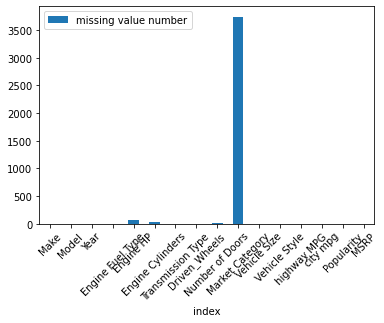

In [31]:
car_data.isna().sum().reset_index(name='missing value number').plot.bar(x='index', y='missing value number', rot=45)

## Answer 6:
1. median of engine cylinders is: 6.0
2. mode of engine cylinders is: 4.0 
3. fillna performed (imputation by mode value)
4. NO, the median value has not changed. 

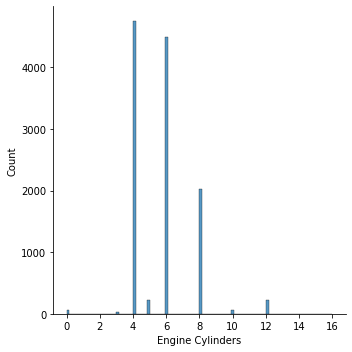

In [35]:
sns.displot(car_data, x="Engine Cylinders")

In [34]:
# Question 7
engine_cyl_median = car_data['Engine Cylinders'].median()
print('median of engine cylinders is:',engine_cyl_median)
engine_cyl_mode = car_data['Engine Cylinders'].mode()
print('mode of engine cylinders is:', engine_cyl_mode)

car_data['Engine Cylinders']= car_data['Engine Cylinders'].fillna(value=engine_cyl_mode)
engine_cyl_median_new = car_data['Engine Cylinders'].median()
print('new median of engine cylinders is:',engine_cyl_median_new)

median of engine cylinders is: 6.0
mode of engine cylinders is: 0    4.0
dtype: float64
new median of engine cylinders is: 6.0


In [74]:
# Question 7
lotus_data = pd.DataFrame()
lotus_data['Make'] = car_data['Make']
lotus_data = lotus_data.loc[lotus_data['Make']=='Lotus']
lotus_data['Engine_HP'] = (car_data['Engine HP'])
lotus_data['Engine_Cylinders'] = (car_data['Engine Cylinders'])

lotus_data.head()


,Make,Engine_HP,Engine_Cylinders
3912,Lotus,189.0,4.0
3913,Lotus,218.0,4.0
3914,Lotus,189.0,4.0
3915,Lotus,189.0,4.0
3916,Lotus,218.0,4.0


In [76]:
lotus_data = lotus_data.drop_duplicates()
print(len(lotus_data['Make']))

9


In [80]:
#lotus_data = lotus_data.drop(['Make'],axis=1)
x = lotus_data.to_numpy()
print(x)

[[189.   4.]
 [218.   4.]
 [217.   4.]
 [350.   8.]
 [400.   6.]
 [276.   6.]
 [345.   6.]
 [257.   4.]
 [240.   4.]]


In [81]:
xTx = np.matmul(x.T,x)
print(xTx)

[[7.31684e+05 1.34100e+04]
 [1.34100e+04 2.52000e+02]]


In [83]:
xTx_inv = np.linalg.inv(xTx)
print(xTx_inv)

[[ 5.53084235e-05 -2.94319825e-03]
 [-2.94319825e-03  1.60588447e-01]]


In [87]:
y = np.array([1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800])
result = np.matmul(xTx_inv, x.T)
w = np.matmul(result, y)
print(w)

[  4.59494481 -63.56432501]


## Answer 7: 
The first element of the final result (w) is 4.59494481 (option 2)
